In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas
import numpy as np
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

#读取数据
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
kdd_data_10percent = pandas.read_csv("E:\Pycharm\Intrusion_Detection\kddcup.data_10_percent.csv", header=None, names = col_names)
kdd_data_10percent.describe()

#数据预处理：1.随机抽样
X_sample=kdd_data_10percent.sample(10000)


num_features = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]
X_raw=X_sample[num_features].astype(float)
y = X_sample['label'].copy()
y[y!='normal.'] = '1'
y[y=='normal.'] = '0'
#数据预处理：2.归一化
MinMaxScaler=MinMaxScaler()
X_Scale=MinMaxScaler.fit_transform(X_raw)




#RF
clf_1 = RandomForestClassifier()
# train_sizes,train_loss,test_loss=learning_curve(clf_1,X_Scale,y,cv=10,
# scoring='accuracy',train_sizes=[0.1,0.33,0.55,0.78,1])
# 
# train_loss_mean_1=np.mean(train_loss,axis=1)
# train_loss_std_1=np.std(train_loss,axis=1)
# test_loss_mean_1=np.mean(test_loss,axis=1)
# test_loss_std_1=np.std(test_loss,axis=1)

C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


C:\Users\Jason\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (15,16,17,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:\Users\Jason\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


ValueError: could not convert string to float: 'smurf.'

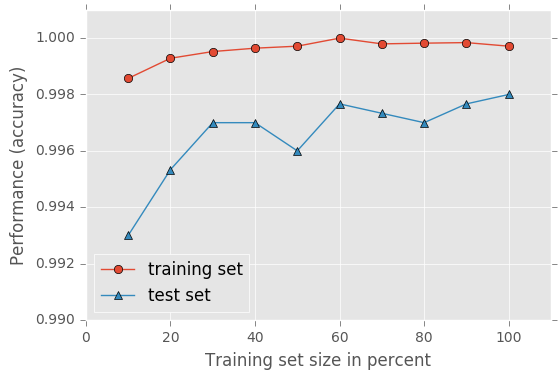

In [21]:
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size=0.3, random_state=42)
    
plt.figure()

plot_learning_curves(X_train, y_train, X_test, y_test, clf_1, scoring='accuracy',print_model=False, style='ggplot')
# plt.ylim([-0.001,0.007])
plt.ylim([0.99,1.001])
plt.show()

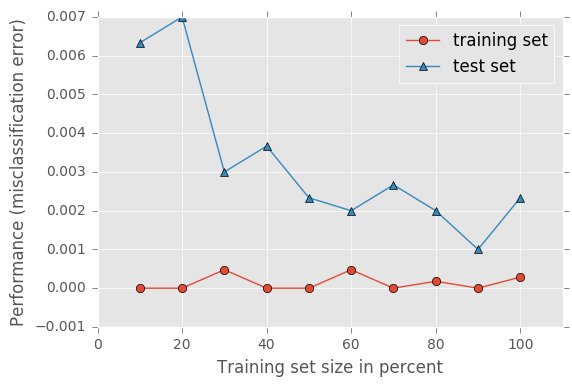

In [22]:
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size=0.3, random_state=42)
    
plt.figure()

plot_learning_curves(X_train, y_train, X_test, y_test, clf_1,print_model=False, style='ggplot')
plt.ylim([-0.001,0.007])

plt.show()